# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python


## Limits of Diversification

- Diversification only works if the assets are not correlated especially during stress periods.  Stress periods are the time when you need diversification to be 'effective'.
- Gap Risk is managed by calibrating the Multipler

In [1]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import numpy as np
import pandas as pd
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# data

In [2]:
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [3]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [4]:
ind_nfirms.shape

(1110, 30)

In [5]:
ind_size.shape

(1110, 30)

## Total Market Capitalisation

In [58]:
ind_mktcap = ind_nfirms * ind_size
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

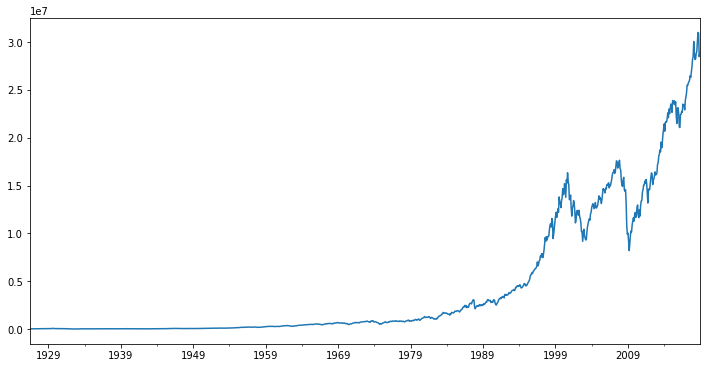

In [59]:
total_mktcap.plot(figsize=(12,6))
plt.show()

## Industry Capitalisation Weight

In [47]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis=0)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


Sum of all industry weights in any one month should add up to 100%

In [50]:
ind_capweight['1926'].sum(axis=1)

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

How the weights of 2 different industries changes over time

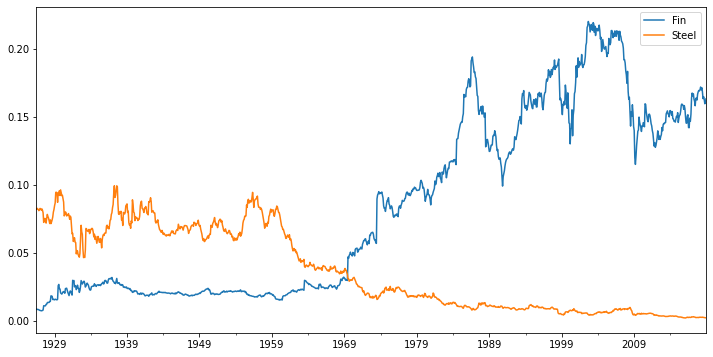

In [51]:
ind_capweight[['Fin','Steel']].plot(figsize=(12,6))
plt.show()

## Total Market Return

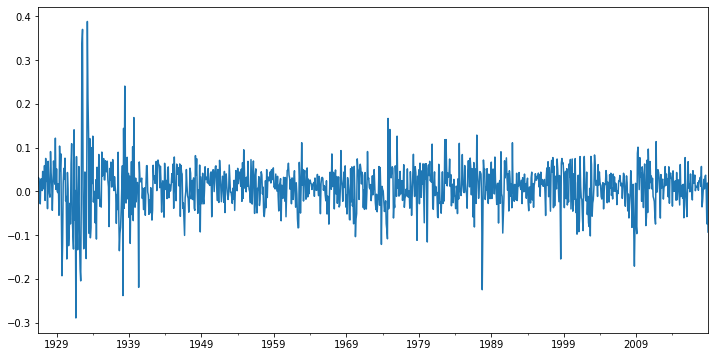

In [63]:
total_market_return = (ind_capweight * ind_return).sum(axis=1)
total_market_return.plot(figsize=(12,6))
plt.show()

## Total Market Index

In [64]:
total_market_index = erk.drawdown(total_market_return).Wealth 

In [65]:
total_market_index.head()

1926-07    1031.375211
1926-08    1061.241004
1926-09    1067.147901
1926-10    1036.729633
1926-11    1065.798400
Freq: M, Name: Wealth, dtype: float64

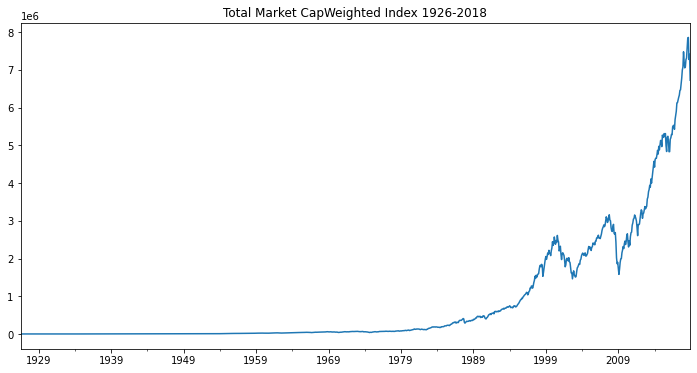

In [66]:
total_market_index.plot(figsize=(12,6), title='Total Market CapWeighted Index 1926-2018')
plt.show()

Trailing 36 Months Market Index

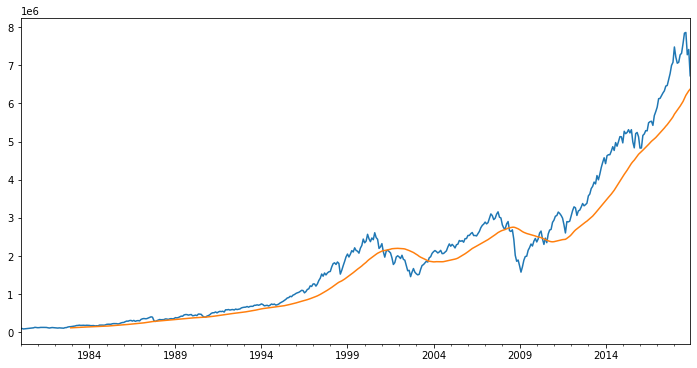

In [68]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot(figsize=(12,6))
plt.show()

## Trailing 36 Months Annualised Return

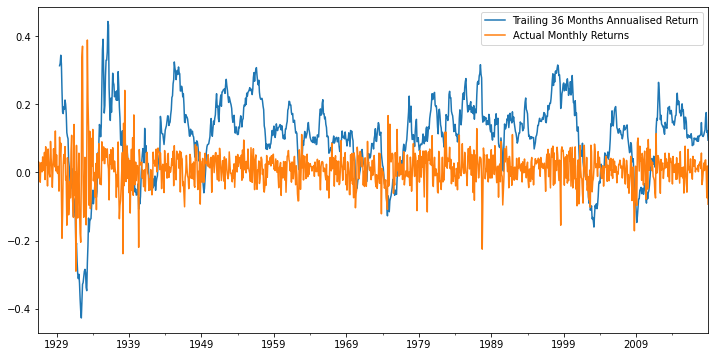

In [69]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label='Trailing 36 Months Annualised Return', legend=True)
total_market_return.plot(label='Actual Monthly Returns', legend=True)
plt.show()

## 36 Months Rolling Correlation

In [73]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.index.names = ['date', 'industry']

In [74]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

## Average correlation of various industries by month

In [75]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

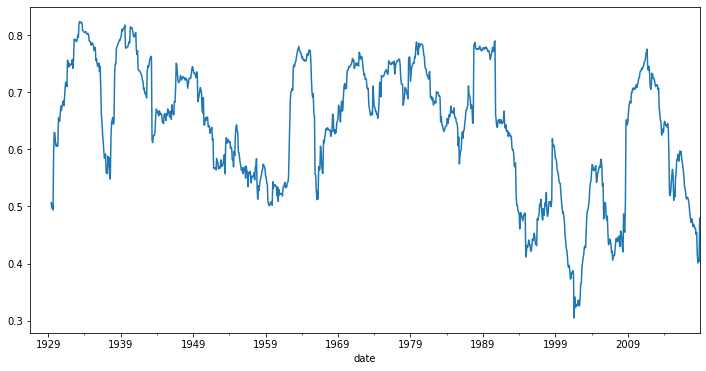

In [76]:
ind_tr36corr.plot(figsize=(12,6))
plt.show()

## Relationship between the average correlation and returns observed over time

Notice the increase in average correlation when there is a dip in annualised returns.  This implies that diversification may not be the most effective during stress period when you most needed it.

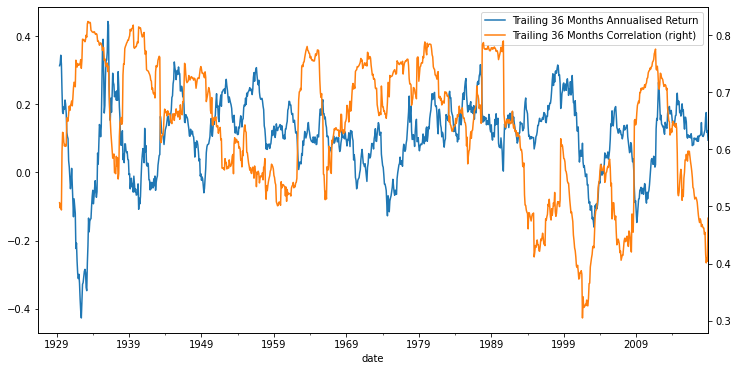

In [79]:
tmi_tr36rets.plot(figsize=(12,6), label='Trailing 36 Months Annualised Return', legend=True)
ind_tr36corr.plot(label='Trailing 36 Months Correlation', legend=True, secondary_y=True)
plt.show()

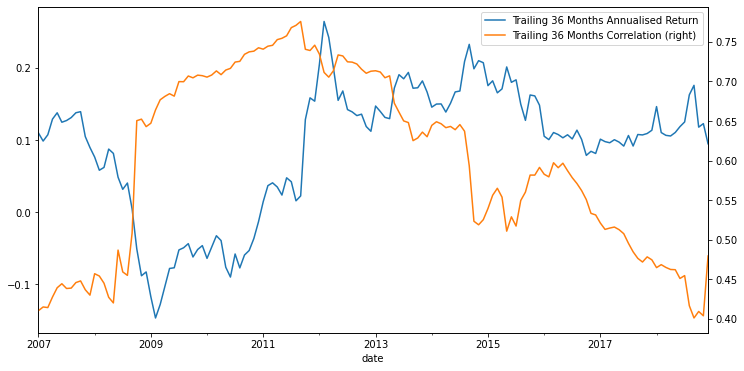

In [80]:
tmi_tr36rets['2007':].plot(figsize=(12,6), label='Trailing 36 Months Annualised Return', legend=True)
ind_tr36corr['2007':].plot(label='Trailing 36 Months Correlation', legend=True, secondary_y=True)
plt.show()

Notice that the correlation of the annualised returns and average correlation is negative.  Which means when returns is down, correlation is up.  Diversification is not helping.

In [84]:
tmi_tr36rets.corr(ind_tr36corr).round(4)

-0.2801